<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [8]:
%cd /gdrive/My Drive/MusicGenre/
%ls -lrt

/gdrive/My Drive/MusicGenre
total 1
-rw------- 1 root root 68 Dec 11 15:14 kaggle.json


In [9]:
import os

In [10]:
os.environ['KAGGLE_CONFIG_DIR']="/gdrive/MyDrive/MusicGenre/"
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.21G/1.21G [00:17<00:00, 64.6MB/s]
100% 1.21G/1.21G [00:17<00:00, 74.8MB/s]


In [11]:
os.listdir('genres/blues')

['blues.00012.wav',
 'blues.00011.wav',
 'blues.00010.wav',
 'blues.00009.wav',
 'blues.00008.wav',
 'blues.00007.wav',
 'blues.00006.wav',
 'blues.00005.wav',
 'blues.00004.wav',
 'blues.00003.wav',
 'blues.00002.wav',
 'blues.00001.wav',
 'blues.00000.wav',
 'blues.00043.wav',
 'blues.00042.wav',
 'blues.00041.wav',
 'blues.00040.wav',
 'blues.00039.wav',
 'blues.00038.wav',
 'blues.00037.wav',
 'blues.00036.wav',
 'blues.00035.wav',
 'blues.00032.wav',
 'blues.00033.wav',
 'blues.00034.wav',
 'blues.00031.wav',
 'blues.00030.wav',
 'blues.00029.wav',
 'blues.00028.wav',
 'blues.00027.wav',
 'blues.00026.wav',
 'blues.00025.wav',
 'blues.00024.wav',
 'blues.00023.wav',
 'blues.00022.wav',
 'blues.00020.wav',
 'blues.00021.wav',
 'blues.00019.wav',
 'blues.00018.wav',
 'blues.00017.wav',
 'blues.00016.wav',
 'blues.00015.wav',
 'blues.00014.wav',
 'blues.00013.wav',
 'blues.00075.wav',
 'blues.00074.wav',
 'blues.00073.wav',
 'blues.00072.wav',
 'blues.00071.wav',
 'blues.00070.wav',


In [12]:
%cd /gdrive/My Drive/MusicGenre/genres/blues
%ls -lrt

/gdrive/My Drive/MusicGenre/genres/blues
total 129300
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00000.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00002.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00001.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00003.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00005.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00004.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00006.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00008.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00007.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00010.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00009.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00011.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00013.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00012.wav
-rw------- 1 root root 1323632 Dec 11 15:28 blues.00015.wav
-rw------- 1 root root 1323632 Dec 11 15:28 bl

In [13]:
import time
songname=f'blues.00000.wav'

In [14]:
import librosa

In [15]:
y,sr=librosa.load(songname,mono=True,duration=5)
print(f'Sampled values count : {len(y)},\n Sampled values eq:{y[1000:1005]}')

Sampled values count : 110250,
 Sampled values eq:[-0.05474854 -0.06137085 -0.06106567 -0.06625366 -0.06402588]


In [17]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Sampled signal plot')

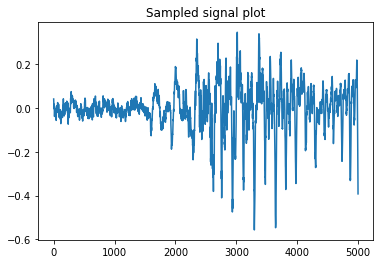

In [18]:
plt.plot(range(0,len(y[10000:15000])),y[10000:15000])
plt.title('Sampled signal plot')

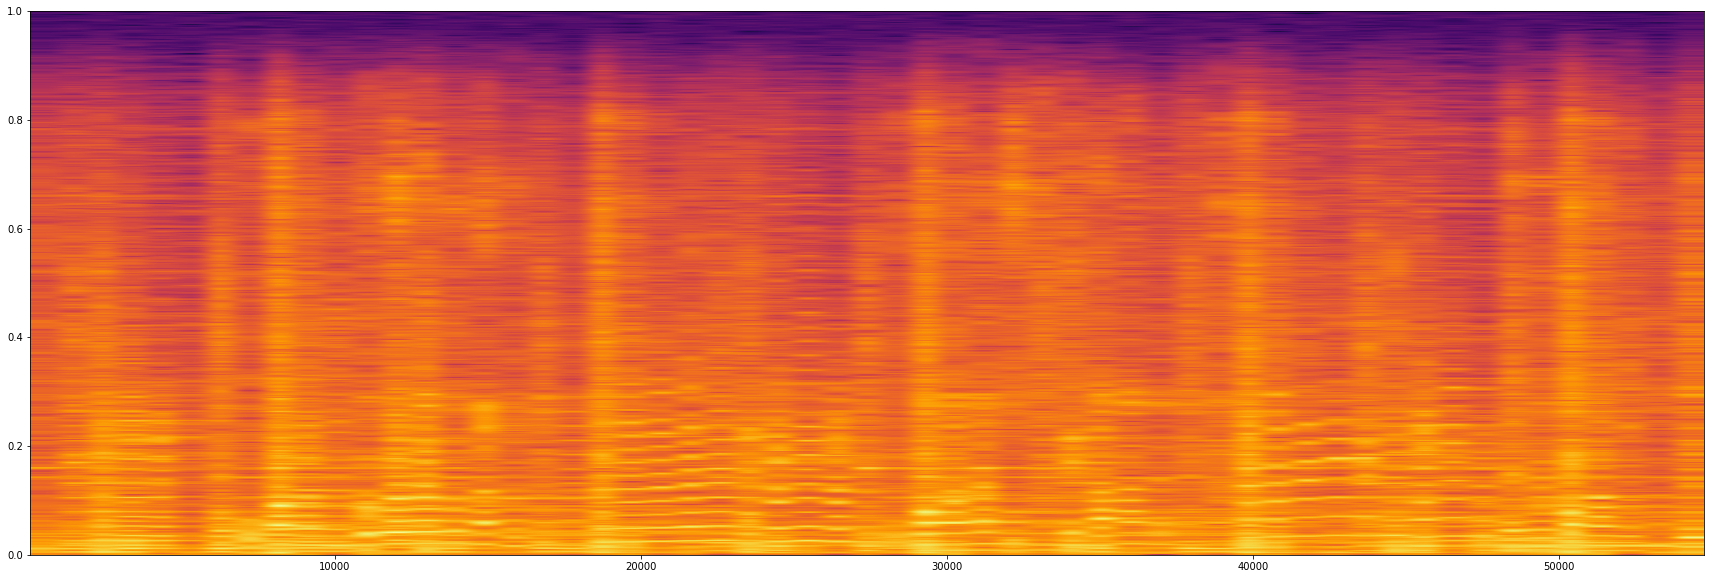

In [21]:
cmap=plt.get_cmap('inferno')
time.sleep(1)
plt.figure(figsize=(30,10))
plt.specgram(y,NFFT=2048,Fs=2,Fc=0,noverlap=128,cmap=cmap,sides='default',mode='default',scale='dB');


In [90]:
header='filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,21):
  header +=f' mfcc{i}'
header += ' label'
header= header.split()
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [97]:
import pandas as pd
import csv

In [98]:
file= open('data.csv','w',newline='')
with file:
  writer=csv.writer(file)
  writer.writerow(header)

pd.DataFrame(pd.read_csv('data.csv'))

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label


In [99]:
%cd /gdrive/My Drive/MusicGenre/
%ls -lrt

/gdrive/My Drive/MusicGenre
total 1270998
-rw-------  1 root root         68 Dec 11 15:14  kaggle.json
-rw-------  1 root root 1301492495 Dec 11 15:16  gtzan-dataset-music-genre-classification.zip
drwx------  3 root root       4096 Dec 11 15:26 'gtzan-dataset-music-genre-classification.zip (Unzipped Files)'/
drwx------ 12 root root       4096 Dec 11 15:39  genres/
-rw-------  1 root root        228 Dec 11 18:24  data.csv


In [100]:
import numpy as np

In [113]:
genres='blues classical country disco hiphop jazz metal pop reggae rock'.split()
count=0
for genre in genres:
  for filename in os.listdir(f'genres/{genre}'):
    songname=f'genres/{genre}/{filename}'
    y,sr=librosa.load(songname,duration=20)
    chroma_stft=librosa.feature.chroma_stft(y=y,sr=sr)
    rmse=librosa.feature.rms(y=y)
    spec_cent=librosa.feature.spectral_centroid(y=y,sr=sr)
    spec_bw=librosa.feature.spectral_bandwidth(y=y,sr=sr)
    rolloff=librosa.feature.spectral_rolloff(y=y,sr=sr)
    zcr=librosa.feature.zero_crossing_rate(y)
    mfcc=librosa.feature.mfcc(y=y,sr=sr)

    to_append=f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
      to_append +=f' {np.mean(e)}'
    to_append += f' {genre}'
    count +=1
    print(f'{count} - {to_append}')
    file=open('data.csv','a',newline='')
    with file:
      writer=csv.writer(file)
      writer.writerow(to_append.split())

1 - blues.00012.wav 0.26993510127067566 1448.2795341737758 1595.0873116277096 2856.2345075496664 0.07686747752320186 -204.18992614746094 127.2174072265625 -18.1663761138916 64.03719329833984 1.2345279455184937 12.77529525756836 1.8363637924194336 -0.6654087901115417 -18.816858291625977 8.415238380432129 -2.9390645027160645 -1.324049949645996 0.21834449470043182 3.670334815979004 -5.710344314575195 -9.555025100708008 -8.759016036987305 -2.9855093955993652 -2.08064866065979 -6.005115032196045 blues
2 - blues.00011.wav 0.3742704689502716 1352.1448656129305 1743.6931022502251 2841.708338620215 0.04607290458236659 -296.92242431640625 125.06420135498047 6.696656227111816 30.650766372680664 1.3774594068527222 12.914871215820312 -3.6498823165893555 9.20743465423584 1.0999064445495605 6.269933223724365 -4.308905124664307 -2.807217597961426 -5.80826997756958 -6.449843883514404 -2.696988105773926 -3.5436418056488037 -2.629385232925415 -1.266969919204712 1.7482675313949585 -4.340889930725098 blues

In [114]:
mfcc.shape

(20, 862)

In [115]:
%cd /gdrive/My Drive/MusicGenre/
%ls -lrt


/gdrive/My Drive/MusicGenre
total 1271484
-rw-------  1 root root         68 Dec 11 15:14  kaggle.json
-rw-------  1 root root 1301492495 Dec 11 15:16  gtzan-dataset-music-genre-classification.zip
drwx------  3 root root       4096 Dec 11 15:26 'gtzan-dataset-music-genre-classification.zip (Unzipped Files)'/
drwx------ 12 root root       4096 Dec 11 15:39  genres/
-rw-------  1 root root     497210 Dec 11 19:17  data.csv


In [119]:
data=pd.read_csv('data.csv')

In [120]:
data.head()

,filename,chroma_stft\t,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,blues.00012.wav,0.269935,1448.279534,1595.087312,2856.234508,0.076867,-204.189926,127.217407,-18.166376,64.037193,1.234528,12.775295,1.836364,-0.665409,-18.816858,8.415238,-2.939065,-1.324050,0.218344,3.670335,-5.710344,-9.555025,-8.759016,-2.985509,-2.080649,-6.005115,blues
1,blues.00011.wav,0.374270,1352.144866,1743.693102,2841.708339,0.046073,-296.922424,125.064201,6.696656,30.650766,1.377459,12.914871,-3.649882,9.207435,1.099906,6.269933,-4.308905,-2.807218,-5.808270,-6.449844,-2.696988,-3.543642,-2.629385,-1.266970,1.748268,-4.340890,blues
2,blues.00010.wav,0.310525,1330.149977,1449.102326,2516.686870,0.061386,-173.002884,143.687942,-24.553015,26.164366,-14.382137,3.102744,-13.048380,6.526221,-4.467963,0.047717,-2.081125,1.281541,-4.664633,-1.284970,-0.187402,-3.833419,0.343286,-2.608510,-1.581790,-4.212582,blues
3,blues.00009.wav,0.268025,1898.221153,1985.382863,4121.972175,0.084443,-202.539383,112.102989,-13.538718,42.728909,-22.720526,14.510815,-10.611921,8.950334,-13.765282,5.251739,-6.789297,3.112820,0.180303,-6.745201,-1.820747,-2.867348,-3.278010,-2.070452,3.720459,-4.802573,blues
4,blues.00008.wav,0.394018,1727.003914,2022.722864,3792.029545,0.065179,-119.705627,122.340958,-15.701075,47.723507,-8.407131,20.543966,-20.087084,22.359741,-12.098310,21.297215,-6.767117,6.626308,-13.170757,5.125469,-5.446170,-1.059437,-6.833626,2.497281,3.607134,-2.376381,blues


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
genre_list=data.iloc[:,-1]
encoder=LabelEncoder()
y=encoder.fit_transform(genre_list)
y.shape,y[:5]

((1000,), array([0, 0, 0, 0, 0]))

In [71]:
data1=data.drop(['filename','label'],axis=1)

In [72]:
data1.shape


(1000, 25)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.model_selection import train_test_split

In [75]:
scaler=StandardScaler()
X=scaler.fit_transform(np.array(data1,dtype=float))

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [81]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [82]:
model=models.Sequential([
                         layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],)),
                         layers.Dropout(0.5),
                         layers.Dense(128,activation="relu"),
                         layers.Dropout(0.5),
                         layers.Dense(10,activation="softmax")
    
])

In [83]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [84]:
model.fit(X_train,y_train,epochs=500,batch_size=128)

Epoch 1/500
7/7 [==============================] - 1s 4ms/step - loss: 2.3308 - accuracy: 0.1562
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 2.1019 - accuracy: 0.2350
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.9286 - accuracy: 0.3262
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.8146 - accuracy: 0.3575
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 1.7565 - accuracy: 0.3512
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 1.7038 - accuracy: 0.3938
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6584 - accuracy: 0.4112
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 1.6279 - accuracy: 0.4238
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5683 - accuracy: 0.4137
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 1.5429 - accuracy: 0.4437
Epoch 11/500
7/7 [===========

In [87]:
pred1=np.argmax(model.predict(X_test[0:1]))

In [88]:
pred1

6

In [89]:
X_test[0]

array([ 0.66068743,  1.03286812,  0.10710966,  0.56359618,  1.82549075,
        1.42247314, -0.90403796, -1.04053069,  1.62258331, -1.41719692,
        0.94890178, -0.84696768,  0.78517747, -0.59867795,  1.45317768,
       -1.17706332,  2.17011172, -1.03060179,  1.28740437, -1.28977696,
        0.98744155, -1.1115363 ,  0.90684535, -1.09300191,  2.32290389])